# eBay Laptop Analysis

This is a data exploration and analysis project that:
- Utilizes a comprehensive dataset sourced from Kaggle
- Aims to delve into the world of laptop listings on eBay
- Investigates various attributes such as brand, price, ratings, and specifications
- Employs data visualization, statistical analysis, and potentially predictive modeling
- Seeks to uncover insights into trends, patterns, and factors influencing laptop sales and prices<br>

I invite you to follow along as we conduct a thorough examination of this rich dataset to gain a deeper understanding of the dynamics within the laptop market

## Step 1: Data Understanding and Exploration

- Importing the necessary libraries

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

- Reading the Data. There are two files to open and explore.

In [2]:
# Directory path
directory = 'data'

# List files in the directory
files = os.listdir(directory)

# Print the list of files
print("Files in 'data' folder:")
for file in files:
    print(file)

Files in 'data' folder:
EbayPcLaptopsAndNetbooksClean.csv
EbayPcLaptopsAndNetbooksUnclean.csv


- Opening the first file and assigning it a dataframe

In [3]:
# File path
file_path = 'data/EbayPcLaptopsAndNetbooksClean.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Brand   Price Currency  Color  \
0  other  303.80        $   gray   
1   dell  400.00        $  black   
2   dell  175.00        $  black   
3     hp   85.00        $  black   
4   dell  101.25        $  other   

                                            Features                Condition  \
0  Backlit Keyboard,  Built-in Microphone,  Built...                      New   
1  Backlit Keyboard, Bluetooth, Built-in Micropho...  Very Good - Refurbished   
2  10/100 LAN Card, Backlit Keyboard, Bluetooth, ...                     Used   
3  Bluetooth, Built-in Microphone, Built-in Webca...       Good - Refurbished   
4  10/100 LAN Card, Built-in Microphone, Built-in...       Good - Refurbished   

                               Condition Description  \
0  A brand-new, unused, unopened, undamaged item ...   
1  The item shows minimal wear and is backed by a...   
2  An item that has been used previously. The ite...   
3  The item shows moderate wear and is backed by ...   
4  The item show

Having printed out the first few rows of the DataFrame using the .head() method gave us a glimpse of the data's structure and the values in each column. Here's a brief overview of the columns in the DataFrame based on the printed output:

- <b>Brand:</b> The manufacturer or company that produces the laptop.
- <b>Price:</b> The cost of the laptop in USD.
- <b>Currency:</b> The currency symbol (always '$' in this case).
- <b>Color:</b> The color of the laptop.
- <b>Features:</b> Additional functionalities or specifications of the laptop.
- <b>Condition:</b> The state of the laptop (e.g., New, Used, Refurbished).
- <b>Condition Description:</b> Description of the laptop's condition.
- <b>Seller Note:</b> Additional information or notes provided by the seller regarding the laptop.
- <b>GPU:</b> The graphics processing unit responsible for rendering images and videos.
- <b>Processor:</b> The central processing unit (CPU) that powers the laptop.
- <b>Release Year:</b> The year the laptop model was released.
- <b>Maximum Resolution:</b> The highest display resolution supported by the laptop.
- <b>OS:</b> The operating system installed on the laptop.
- <b>Storage Type:</b> The type of storage technology used (e.g., SSD, HDD, eMMC).
- <b>Hard Drive Capacity:</b> The storage capacity of the traditional hard disk drive (HDD) in gigabytes (GB).
- <b>Hard Drive Capacity Unit:</b> Unit of measurement for HDD capacity (always 'gb' in this case).
- <b>SSD Capacity:</b> The storage capacity of the solid-state drive (SSD) in gigabytes (GB).
- <b>SSD Capacity Unit:</b> Unit of measurement for SSD capacity (can be 'tb' or 'gb').
- <b>Screen Size (inch):</b> The diagonal measurement of the laptop screen in inches.
- <b>Ram Size:</b> The amount of random access memory (RAM) in gigabytes (GB).
- <b>Ram Size Unit:</b> Unit of measurement for RAM size (always 'gb' in this case).

## Check for Data Types

Ensure that each column has the correct data type. For example, numerical columns should be stored as integers or floats, and categorical columns should be stored as strings or categories.

In [4]:
# Check the data types of each column
print(df.dtypes)

Brand                        object
Price                       float64
Currency                     object
Color                        object
Features                     object
Condition                    object
Condition Description        object
Seller Note                  object
GPU                          object
Processor                    object
Processor Speed              object
Processor Speed Unit         object
Type                         object
Width of the Display        float64
Height of the Display       float64
OS                           object
Storage Type                 object
Hard Drive Capacity         float64
Hard Drive Capacity Unit     object
SSD Capacity                float64
SSD Capacity Unit            object
Screen Size (inch)           object
Ram Size                    float64
Ram Size Unit                object
dtype: object


Now we will convert the 'Screen Size (inch)', 'Processor Speed', and 'Ram Size" columns to float64.

In [5]:
# Convert 'Screen Size (inch)' column to numeric, coerce errors to NaN
# df['Screen Size (inch)'] = pd.to_numeric(df['Screen Size (inch)'], errors='coerce')

# Identify rows with NaN values in 'Screen Size (inch)'
# problematic_rows = df[df['Screen Size (inch)'].isna()]

# Display the problematic rows
# print(problematic_rows[['Screen Size (inch)']])

In [8]:
# Convert 'Screen Size (inch)' column to float64
df['Screen Size (inch)'] = pd.to_numeric(df['Screen Size (inch)'], errors='coerce')

In [7]:
# Convert 'Processor Speed' column to float64
df['Processor Speed'] = pd.to_numeric(df['Processor Speed'], errors='coerce')

# Convert 'Ram Size' column to float64
df['Ram Size'] = pd.to_numeric(df['Ram Size'], errors='coerce')

# Verify the data types after conversion
print(df.dtypes)

Brand                        object
Price                       float64
Currency                     object
Color                        object
Features                     object
Condition                    object
Condition Description        object
Seller Note                  object
GPU                          object
Processor                    object
Processor Speed             float64
Processor Speed Unit         object
Type                         object
Width of the Display        float64
Height of the Display       float64
OS                           object
Storage Type                 object
Hard Drive Capacity         float64
Hard Drive Capacity Unit     object
SSD Capacity                float64
SSD Capacity Unit            object
Screen Size (inch)          float64
Ram Size                    float64
Ram Size Unit                object
dtype: object


## Explore Summary Statistics: 
Compute summary statistics (mean, median, min, max, etc.) for numerical columns to understand the distribution of the data. Use methods like .describe() in pandas.

In [9]:
# Compute summary statistics for numerical columns
summary_statistics = df.describe()

# Display summary statistics
print(summary_statistics)

             Price  Processor Speed  Width of the Display  \
count  4183.000000      2076.000000           1915.000000   
mean    328.130117         2.752042           1702.125326   
std     387.640478        17.522375            463.409973   
min       4.420000        -3.100000            800.000000   
25%     100.000000         1.800000           1363.000000   
50%     234.000000         2.400000           1920.000000   
75%     413.200000         2.800000           1920.000000   
max    3900.000000       800.000000           3840.000000   

       Height of the Display  Hard Drive Capacity  SSD Capacity  \
count            1915.000000          1104.000000   2127.000000   
mean              978.471018           227.202899    268.342266   
std               294.198849           201.231991    224.996614   
min               480.000000             0.000000      0.000000   
25%               768.000000            16.000000    120.000000   
50%              1080.000000           256.00000

The summary statistics provide valuable insights into the distribution and characteristics of the numerical columns in our dataset. Here are some observations and potential actions we can take based on the summary statistics:

- Price Distribution:
 - The mean price of laptops is around \\$328, with a wide range from \\$4.42 to \\$3900.
 - You can visualize the distribution of prices using a histogram to understand the price range and identify any outliers.

- Processor Speed:
 - The mean processor speed is approximately 2.75 GHz, with a standard deviation of 17.52 GHz.
 - There seems to be some outliers, such as negative values and extremely high values like 800 GHz. These outliers might need further investigation and possibly cleaning.

- Display Dimensions:
 - The width and height of the display have a wide range, with mean values around 1702 and 978, respectively.
 - You can visualize the distribution of display dimensions using histograms or boxplots to understand the common screen sizes.

- Storage Capacities:
 - The hard drive capacity and SSD capacity have mean values around 227 GB and 268 GB, respectively.
 - There are some laptops with 0 GB storage capacity, which might be outliers or missing values that need to be addressed.

- Screen Size:
 - The mean screen size is approximately 14.42 inches, with a standard deviation of 28.35 inches.
 - There seems to be some outliers with extremely high values like 1435 inches, which might be errors in the data.

- RAM Size:
 - The mean RAM size is around 20.48 GB, with a wide range from 1 GB to 8192 GB.
 - Similar to other numerical columns, there are outliers in RAM size that need to be investigated.

Based on these observations, visualizing the data can help in further understanding the distribution and identifying any patterns, outliers, or inconsistencies. We can create histograms, boxplots, scatter plots, or other types of visualizations to explore the data more comprehensively.

Additionally, further data cleaning and preprocessing might be necessary to address outliers, missing values, or errors before proceeding with further analysis or modeling.

## Visualizations of Our Data

Let's proceed with visualizing the data to gain more insights. We'll create visualizations for each numerical column to understand their distributions and identify any outliers or patterns. We'll use histograms for univariate distributions and scatter plots for bivariate relationships.

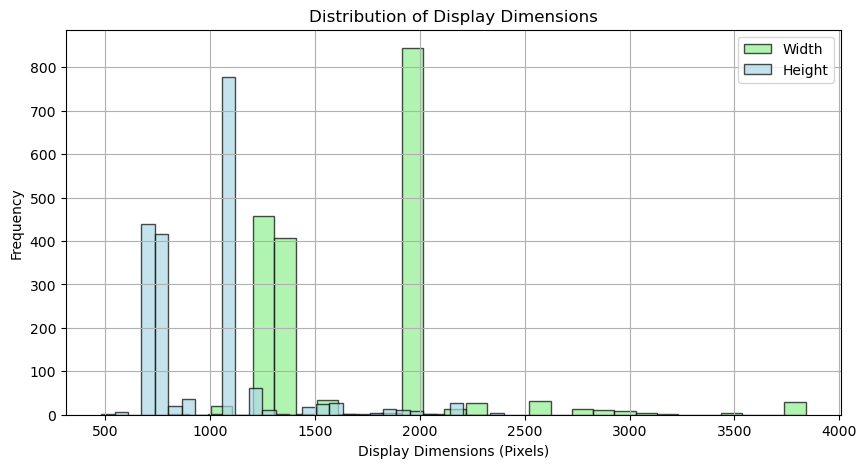

In [17]:
# Histogram for Display Dimensions
plt.figure(figsize=(10, 5))
plt.hist(df['Width of the Display'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7, label='Width')
plt.hist(df['Height of the Display'], bins=30, color='lightblue', edgecolor='black', alpha=0.7, label='Height')
plt.xlabel('Display Dimensions (Pixels)')
plt.ylabel('Frequency')
plt.title('Distribution of Display Dimensions')
plt.legend()
plt.grid(True)
plt.show()

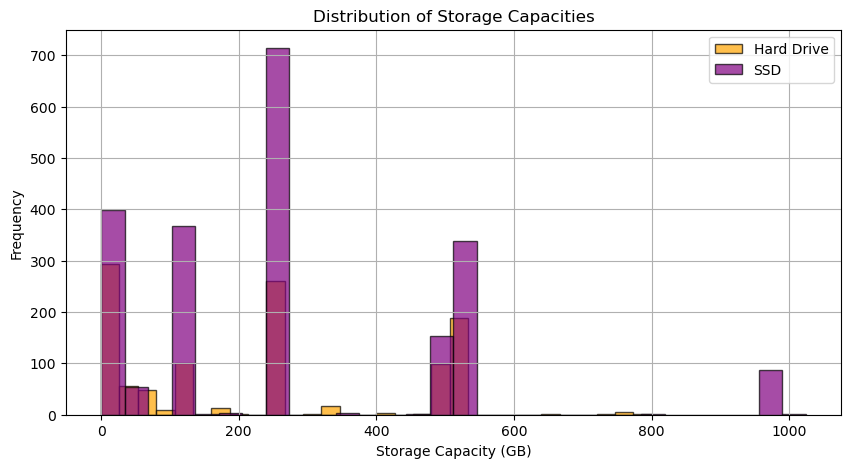

In [21]:
# Histogram for Storage Capacities
plt.figure(figsize=(10, 5))
plt.hist(df['Hard Drive Capacity'], bins=30, color='orange', edgecolor='black', alpha=0.7, label='Hard Drive')
plt.hist(df['SSD Capacity'], bins=30, color='purple', edgecolor='black', alpha=0.7, label='SSD')
plt.xlabel('Storage Capacity (GB)')
plt.ylabel('Frequency')
plt.title('Distribution of Storage Capacities')
plt.legend()
plt.grid(True)
plt.show()

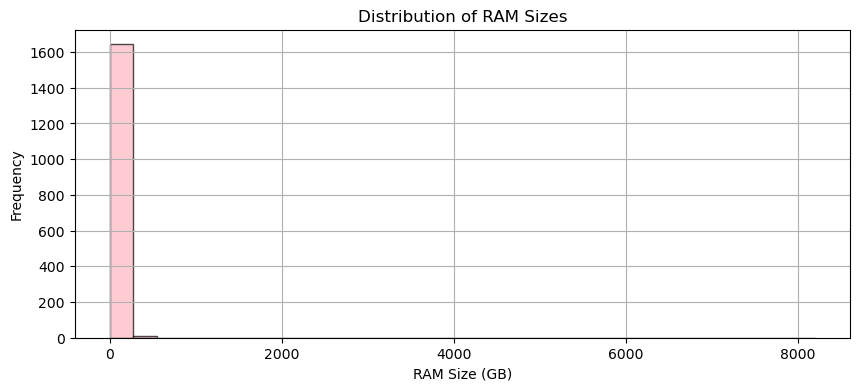

In [24]:
# Histogram for RAM Size
plt.figure(figsize=(10, 4))
plt.hist(df['Ram Size'], bins=30, color='lightpink', edgecolor='black', alpha=0.7)
plt.xlabel('RAM Size (GB)')
plt.ylabel('Frequency')
plt.title('Distribution of RAM Sizes')
plt.grid(True)
plt.show()

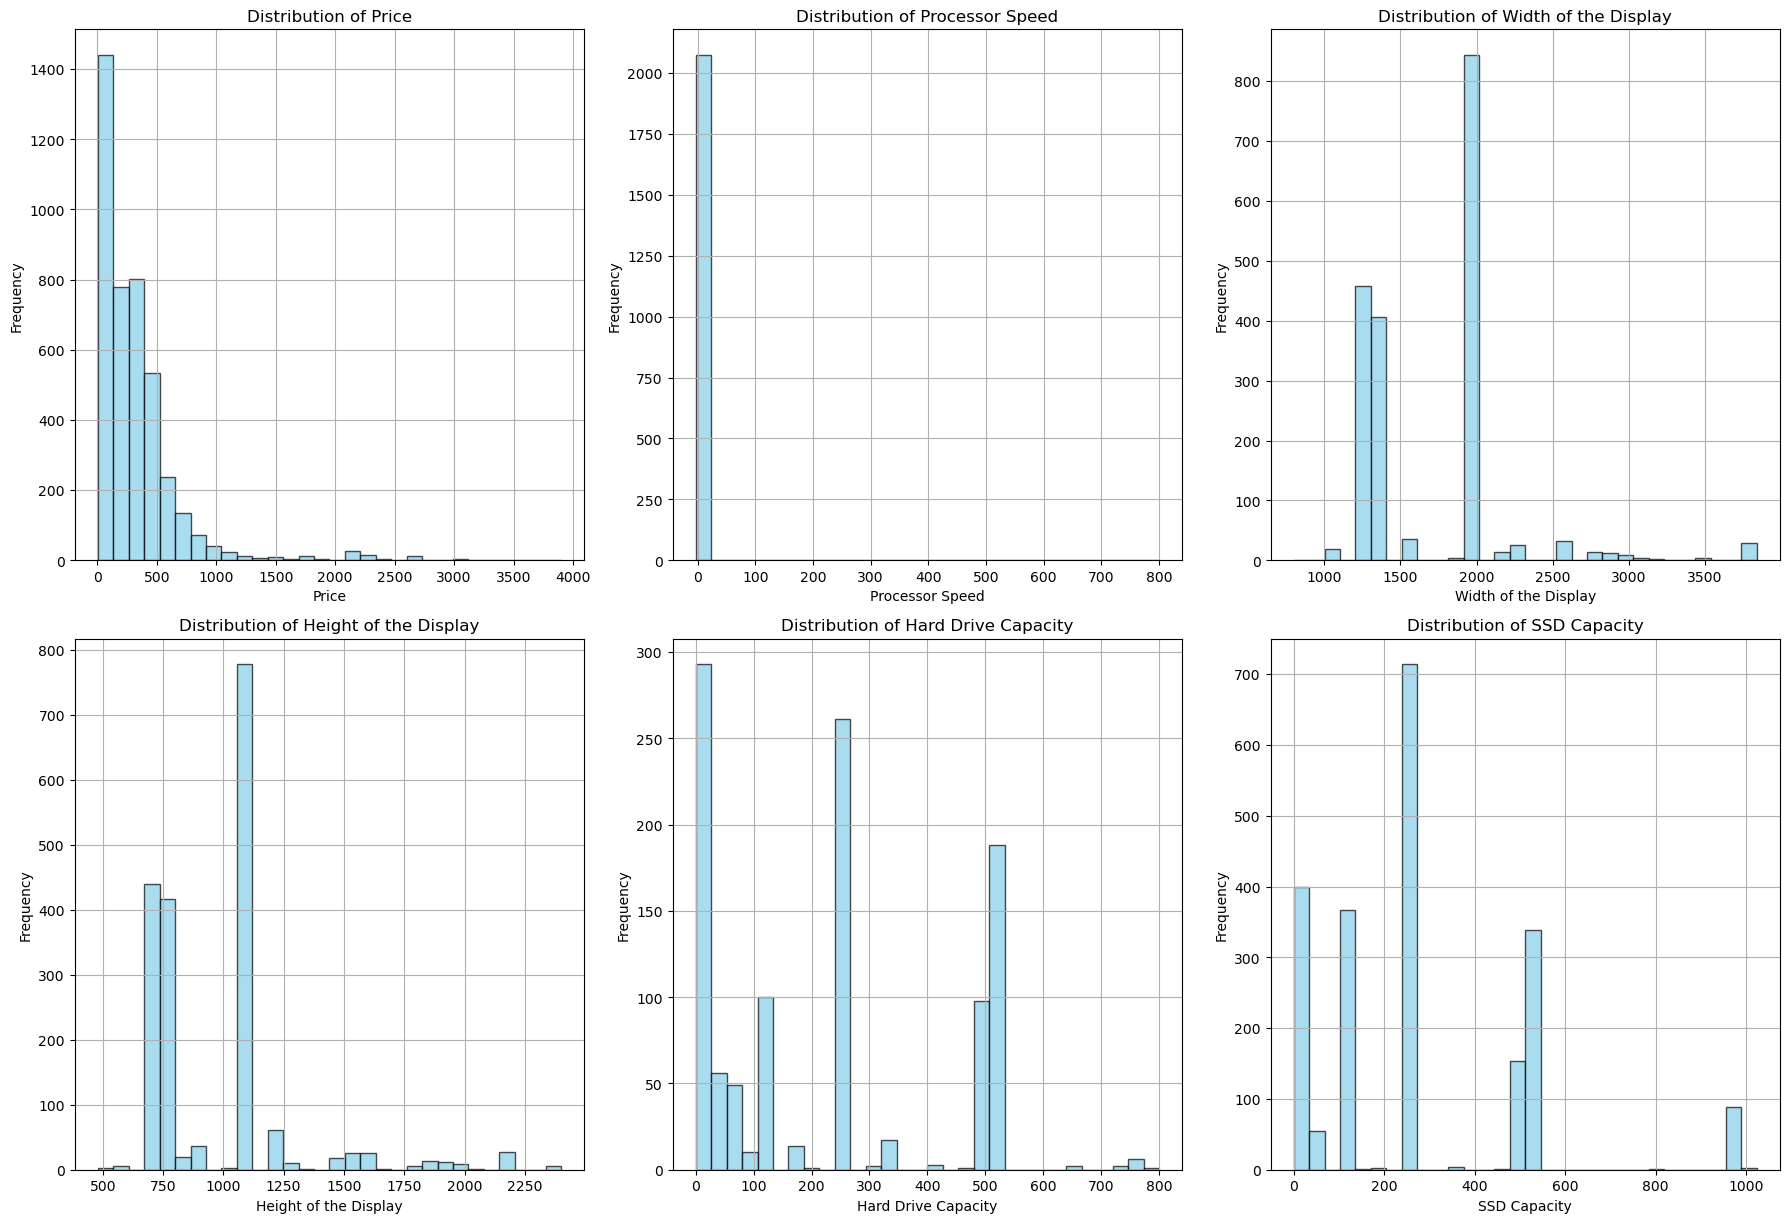

In [23]:
# Create subplots with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axs array to iterate over each subplot
axs = axs.flatten()

# Plot each numerical column
numerical_columns = ['Price', 'Processor Speed', 'Width of the Display', 
                     'Height of the Display', 'Hard Drive Capacity', 
                     'SSD Capacity', 'Screen Size (inch)', 'Ram Size']

for i, column in enumerate(numerical_columns):
    if i < len(numerical_columns) - 2:  # Skip the last two columns
        axs[i].hist(df[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Distribution of {column}')
        axs[i].grid(True)

# Remove empty subplots
for i in range(len(numerical_columns) - 2, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()
